# A/B Testing: A Quick Guide

A/B testing (or split testing) compares two versions of a webpage, app, or user experience to see which performs better. It’s widely used in marketing, product development, and UX design to make data-driven decisions.  

## What You’ll Learn

- **Binary A/B Testing:** Compare two versions with yes/no outcomes.  
- **Continuous A/B Testing:** Compare averages for numerical data and check statistical significance.   

## How to Use

1. **Run the code cells** to follow along.  
2. **Experiment** with your own datasets after finishing the tutorials.  

Unlock the power of A/B testing and turn data into better decisions!

## Step 1: Exploratory Data Analysis (EDA) & Problem Definition

### EDA
Before running the A/B test, understand your dataset:

1. **Load Dataset**: Import and inspect the data.  
2. **Summary Statistics**: Check central tendency, dispersion, and distribution.  
3. **Missing Values**: Identify and handle missing data.  
4. **Data Types**: Verify column types.  
5. **Group Descriptions**: Compute statistics by `version` (calculated descriptive statistics, including skewness and kurtosis).  
6. **Cross-tabulations**: Compare retention rates across versions.  
7. **Plots**: Visualize distributions and retention rates.  

### Problem Definition
- **Control Group**: No treatment.  
- **Treatment Group**: Receives the treatment.  

### Hypotheses
- **Null ($H_0$)**: No difference between groups.  
- **Alternative (H1)**: Significant difference exists.  

## Step 2: Data Preprocessing
Prepare data for testing:

1. Handle missing values.  
2. Detect and manage outliers.  
3. Transform/normalize data if needed.  
4. Create new features if necessary.  

## Step 3: Set Type I & II Error Probabilities
- **Type I (Alpha)**: Reject $H_0$ when true (commonly 0.05).  
- **Type II (Beta)**: Fail to reject $H_0$ when false (commonly 0.20).  
- **Power**: 1 - Beta (usually 0.80).  

## Step 4: Sample Size & Selection

### Calculate Sample Size
**Binary Outcomes:**

$$
n = \left( Z_{1-\alpha/2} + Z_{1-\beta} \right)^2 \frac{p_1(1 - p_1) + p_2(1 - p_2)}{(p_1 - p_2)^2}
$$

**Continuous Outcomes:**

$$
n = \left( \frac{Z_{\alpha/2} + Z_{\beta}}{\mu_1 - \mu_2} \right)^2 \cdot 2\sigma^2
$$

### Choose Samples
- Randomly select control and treatment groups.  
- Ensure samples represent the population.  

## Step 5: Assign Users
- Randomly assign users to control or treatment groups.  

## Step 6: Perform Statistical Test
- **Binary Outcomes**: Z-test (or Chi-Square/Fisher’s Exact).  
- **Continuous Outcomes**: t-test.  

## Step 7: Analyze Results

### Practical Significance
- Evaluate if results are meaningful in real-world context.  

### Reporting
- Summarize test statistic, p-value, confidence intervals, and implications.  
- Use charts/graphs for clarity.

# 1.1 EDA and Dataset Check

Before running an A/B test, perform exploratory data analysis (EDA) to understand the dataset's structure and characteristics:

1. **Loading the Dataset**  
   - Import `Cookie_Cats_cleaned_v01.csv` and inspect the first few rows.  
   - Helps identify columns and understand the initial structure.  

2. **Summary Statistics**  
   - Compute mean, median, standard deviation, variance, and overall distribution.  

3. **Missing Values**  
   - Check for missing values and handle them appropriately.  
   - Ensures data integrity and avoids biases.  

4. **Data Types**  
   - Verify column data types for accurate calculations and analyses.  

5. **Descriptive Statistics by Group**  
   - Group by `version` (control vs. treatment) and calculate group statistics.  
   - Includes mean, standard deviation, skewness, and kurtosis to spot outliers.  

6. **Cross-tabulations**  
   - Cross-tab `version` with `retention_1` and `retention_7` to see retention rates.  
   - Understand relationships between categorical variables and group performance.  

7. **Plots**  
   - Use bar plots, box plots, and heatmaps to visualize distributions and correlations.  
   - Provides graphical insight into patterns and relationships in the data.  

Performing these EDA steps ensures a strong understanding of the dataset, highlights potential issues, and prepares the data for meaningful A/B testing.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv('~/Documents/ds-ml-notes-projects-and-tutorials/ab-testing /how-to-do-ab-testing/data/Cookie_Cats_cleaned_v01.csv')

# Check for duplicate user IDs
if df['userid'].duplicated().any():
    print("Duplicates found in user_id. Dropping duplicates...")
    df = df.drop_duplicates(subset='userid')

# Set user_id as the index
df.set_index('userid', inplace=True)

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Display data types and non-null counts
print("\nData types and non-null counts:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
        version  sum_gamerounds  retention_1  retention_7
userid                                                   
116     gate_30               3        False        False
337     gate_30              38         True        False
377     gate_40             165         True        False
483     gate_40               1        False        False
488     gate_40             179         True         True

Summary statistics of the dataset:
       sum_gamerounds
count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 90189 entries, 116 to 9999861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   version         90189 non-null  object
 1   sum_gamerounds  90189 non-null  int64 
 2   retentio

In [2]:
# Numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Descriptive statistics
descriptive_stats = df[numeric_cols].describe().T
descriptive_stats['skewness'] = df[numeric_cols].skew()
descriptive_stats['kurtosis'] = df[numeric_cols].kurtosis()

print("\nDescriptive Statistics (including skewness and kurtosis):")
print(descriptive_stats)


# Percentage of each category in categorical features
version_counts = df['version'].value_counts(normalize=True) * 100
retention_1_counts = df['retention_1'].value_counts(normalize=True) * 100
retention_7_counts = df['retention_7'].value_counts(normalize=True) * 100

print("\nPercentage of each category in 'version':")
print(version_counts)

print("\nPercentage of each category in 'retention_1':")
print(retention_1_counts)

print("\nPercentage of each category in 'retention_7':")
print(retention_7_counts)




Descriptive Statistics (including skewness and kurtosis):
                  count       mean         std  min  25%   50%   75%      max  \
sum_gamerounds  90189.0  51.872457  195.050858  0.0  5.0  16.0  51.0  49854.0   

                  skewness      kurtosis  
sum_gamerounds  185.436313  47130.369631  

Percentage of each category in 'version':
version
gate_40    50.437415
gate_30    49.562585
Name: proportion, dtype: float64

Percentage of each category in 'retention_1':
retention_1
False    55.47905
True     44.52095
Name: proportion, dtype: float64

Percentage of each category in 'retention_7':
retention_7
False    81.393518
True     18.606482
Name: proportion, dtype: float64


In [3]:
# Cross-tabulation for version and retention_1
crosstab_retention_1 = pd.crosstab(df['version'], df['retention_1'], normalize='index')
crosstab_retention_1.columns = ['Did Not Return', 'Returned']
crosstab_retention_1 = crosstab_retention_1.reset_index()

# Cross-tabulation for version and retention_7
crosstab_retention_7 = pd.crosstab(df['version'], df['retention_7'], normalize='index')
crosstab_retention_7.columns = ['Did Not Return', 'Returned']
crosstab_retention_7 = crosstab_retention_7.reset_index()

print("\nCross-tabulation for version and retention_1:")
print(crosstab_retention_1)

print("\nCross-tabulation for version and retention_7:")
print(crosstab_retention_7)



Cross-tabulation for version and retention_1:
   version  Did Not Return  Returned
0  gate_30        0.551812  0.448188
1  gate_40        0.557717  0.442283

Cross-tabulation for version and retention_7:
   version  Did Not Return  Returned
0  gate_30        0.809799  0.190201
1  gate_40        0.818000  0.182000


In [4]:
# Define numeric columns
# numeric_cols = df.select_dtypes(include=np.number).columns.tolist()  # if not already defined

# Aggregation functions
agg_funcs = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt']

# Compute descriptive statistics including skewness and kurtosis
grouped_stats = df.groupby('version')[numeric_cols].agg(['count', 'mean', 'std', 'min', 
                                                        lambda x: x.quantile(0.25), 
                                                        lambda x: x.quantile(0.5), 
                                                        lambda x: x.quantile(0.75), 
                                                        'max', 
                                                        lambda x: x.skew(), 
                                                        lambda x: x.kurtosis()])

# Rename lambda columns for clarity
grouped_stats.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']

# Reset index for a clean table
grouped_stats = grouped_stats.reset_index()

print("\nDescriptive Statistics with Skewness and Kurtosis by Version:")
print(grouped_stats)



Descriptive Statistics with Skewness and Kurtosis by Version:
   version  count       mean         std  min  25%   50%   75%    max  \
0  gate_30  44700  52.456264  256.716423    0  5.0  17.0  50.0  49854   
1  gate_40  45489  51.298776  103.294416    0  5.0  16.0  52.0   2640   

     skewness      kurtosis  
0  163.709871  31688.380643  
1    5.967288     63.106084  


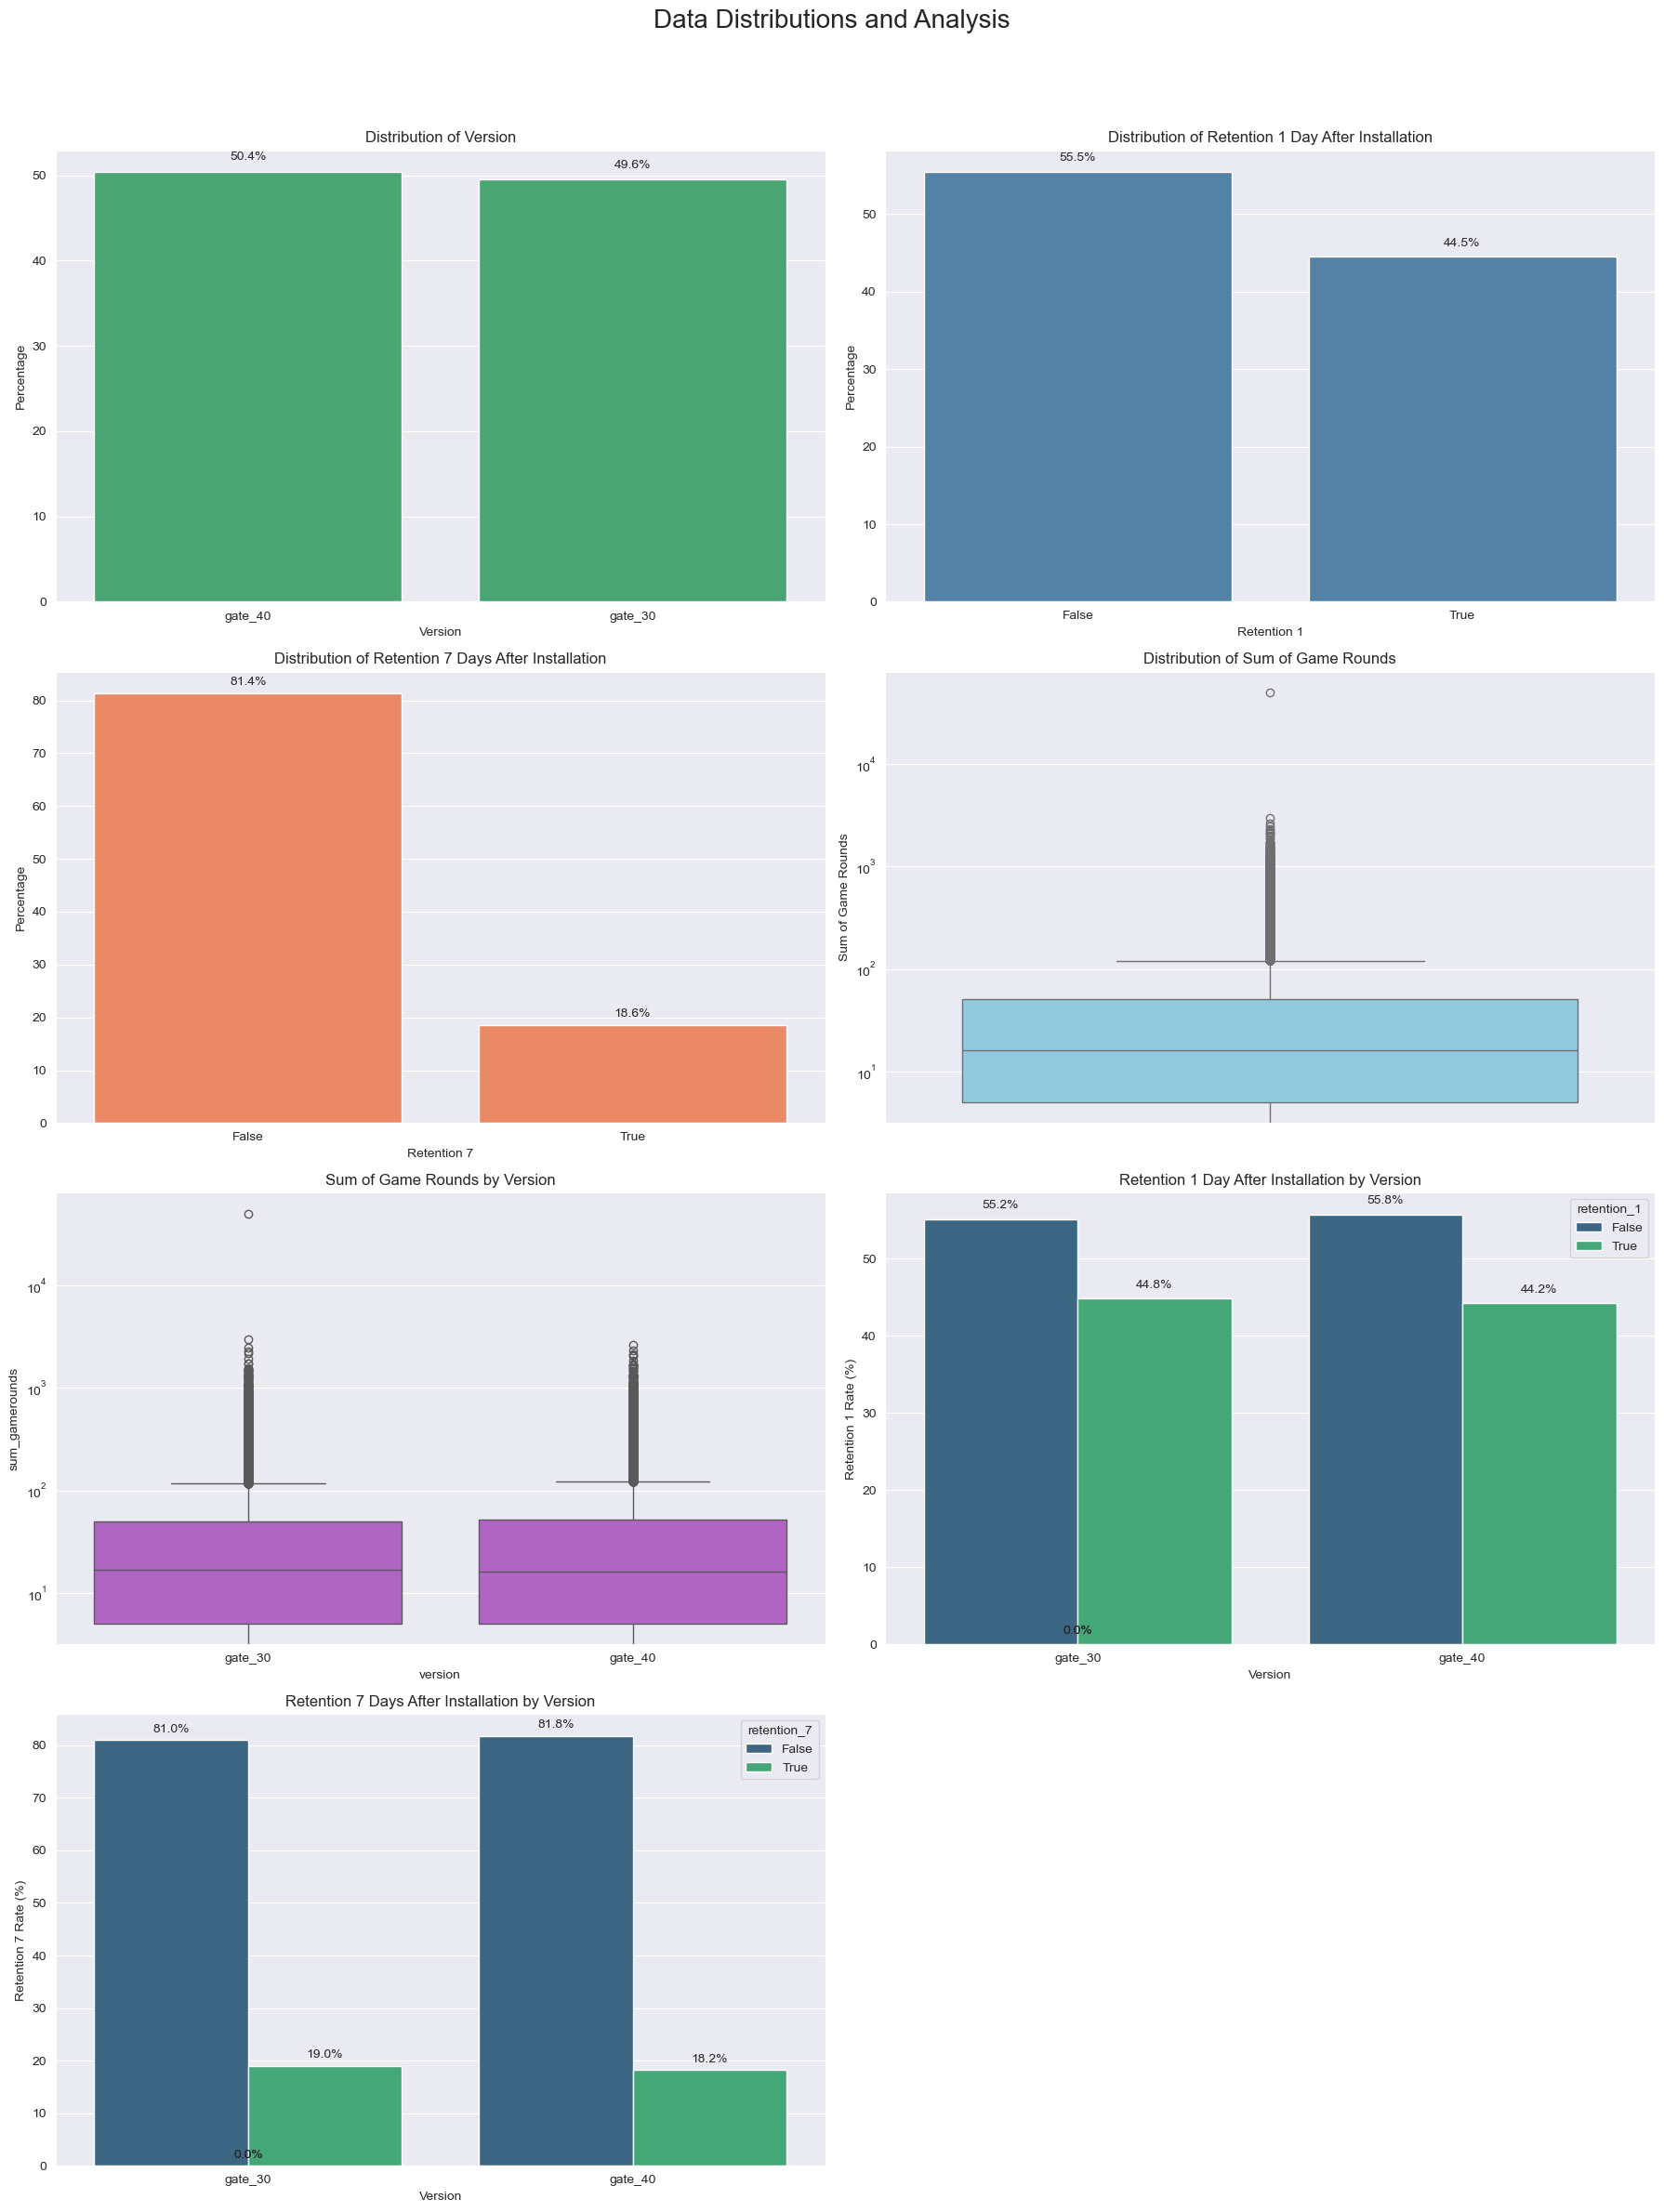

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("darkgrid")

# Function to calculate percentages
def value_counts_percent(df, col):
    return df[col].value_counts(normalize=True) * 100

# Function to plot bar chart with percentages
def plot_bar(ax, data, title, xlabel, ylabel='Percentage', color='steelblue'):
    sns.barplot(x=data.index, y=data.values, ax=ax, color=color)
    for i, val in enumerate(data.values):
        ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Calculate distributions
version_counts = value_counts_percent(df, 'version')
retention_1_counts = value_counts_percent(df, 'retention_1')
retention_7_counts = value_counts_percent(df, 'retention_7')

# Retention by version
def retention_by_version(df, retention_col):
    ret = df.groupby(['version', retention_col]).size().reset_index(name='counts')
    ret['percentage'] = ret['counts'] / ret.groupby('version')['counts'].transform('sum') * 100
    return ret

retention_1_by_version = retention_by_version(df, 'retention_1')
retention_7_by_version = retention_by_version(df, 'retention_7')

# Create figure and axes
fig, axes = plt.subplots(4, 2, figsize=(18, 25))
fig.suptitle('Data Distributions and Analysis', fontsize=20)

# Plot distributions
plot_bar(axes[0, 0], version_counts, 'Distribution of Version', 'Version', color='mediumseagreen')
plot_bar(axes[0, 1], retention_1_counts, 'Distribution of Retention 1 Day After Installation', 'Retention 1', color='steelblue')
plot_bar(axes[1, 0], retention_7_counts, 'Distribution of Retention 7 Days After Installation', 'Retention 7', color='coral')

# Boxplots
sns.boxplot(ax=axes[1, 1], y=df['sum_gamerounds'], color='skyblue')
axes[1, 1].set_title('Distribution of Sum of Game Rounds')
axes[1, 1].set_ylabel('Sum of Game Rounds')
axes[1, 1].set_yscale('log')

sns.boxplot(ax=axes[2, 0], x='version', y='sum_gamerounds', data=df, color='mediumorchid')
axes[2, 0].set_title('Sum of Game Rounds by Version')
axes[2, 0].set_yscale('log')

# Retention by version barplots
def plot_retention(ax, data, retention_col, title):
    sns.barplot(ax=ax, x='version', y='percentage', hue=retention_col, data=data, palette='viridis')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel('Version')
    ax.set_ylabel(f'{retention_col.replace("_", " ").title()} Rate (%)')

plot_retention(axes[2, 1], retention_1_by_version, 'retention_1', 'Retention 1 Day After Installation by Version')
plot_retention(axes[3, 0], retention_7_by_version, 'retention_7', 'Retention 7 Days After Installation by Version')

# Remove empty subplot
fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Dataset Description and Findings

The dataset used is `Cookie_Cats_cleaned_v01.csv`, containing user behavior and retention data from the Cookie Cats game before and after an intervention.

### Columns

1. **version** (object)  
   - Indicates control or treatment group: `gate_30` (control), `gate_40` (treatment)  
   - **Distribution:** gate_30: 49.56%, gate_40: 50.44%  
   - Nearly equal distribution, making it suitable for A/B testing.  

2. **sum_gamerounds** (int64)  
   - Total number of game rounds played by the user  
   - **Stats:** Mean: 51.87, SD: 195.05, Min: 0, Median: 16, Max: 49,854, Skewness: 185.44, Kurtosis: 47,130.37  
   - **Insight:** Highly skewed with extreme outliers; most users play few rounds, but a few play a lot.  

3. **retention_1** (bool)  
   - Whether the user returned one day after installation  
   - **Distribution:** True: 44.52%, False: 55.48%  
   - **Insight:** Less than half of users return after one day.  

4. **retention_7** (bool)  
   - Whether the user returned seven days after installation  
   - **Distribution:** True: 18.61%, False: 81.39%  
   - **Insight:** Very few users return after seven days.  

### Dataset Overview

- **Total Entries:** 90,189


# 1.2 Define the Problem

The goal of this A/B test is to compare two groups (control vs. treatment) to see if the intervention had a significant effect.

- **Control Group:** No treatment.  
- **Treatment Group:** Receives the intervention.  

We aim to answer three questions:

### Question 1: Increase in Average Game Sessions
- **Objective:** Has the average number of game sessions increased by 5?  
- **Null Hypothesis ($H_0$):** No increase of 5 sessions in the treatment group.  
- **Alternative Hypothesis ($H_1$):** Average sessions increased by 5 in the treatment group.  

### Question 2: 1-Day Player Retention
- **Objective:** Has 1-day retention increased by 2%?  
- **Null Hypothesis ($H_0$):** No 2% increase in 1-day retention in the treatment group.  
- **Alternative Hypothesis ($H_1$):** 1-day retention increased by 2% in the treatment group.  

### Question 3: 7-Day Player Retention
- **Objective:** Has 7-day retention increased by 5%?  
- **Null Hypothesis ($H_0$):** No 5% increase in 7-day retention in the treatment group.  
- **Alternative Hypothesis ($H_1$):** 7-day retention increased by 5% in the treatment group.  


# 2. Preprocessing Steps

Before running the A/B test, preprocess the data to ensure it’s clean and ready for analysis.

### Key Steps:

1. **Handling Missing Values**  
   - Remove or impute missing values to maintain data integrity and avoid biases.  

2. **Outlier Detection**  
   - Identify and handle outliers that may skew results.  
   - Outliers can distort statistical tests and lead to incorrect conclusions.  

3. **Data Transformation**  
   - Normalize or standardize variables if necessary, especially for continuous data.  
   - Ensures variables on different scales do not affect the analysis.  

4. **Feature Engineering**  
   - Create new features if needed, e.g., interaction terms or derived metrics.  
   - Helps better capture patterns in the data.  

### Preprocessing in Our Case

- The dataset is already clean with no missing values.  
- Focus is on handling outliers identified during EDA.  
- Data transformation and feature engineering are not required since we are performing statistical tests, not predictive modeling.  

By preprocessing the data, we ensure the dataset is suitable for accurate and reliable A/B testing.


## Removing Outliers Using the IQR Method

To avoid skewed results from extreme values, we remove outliers using the Interquartile Range (IQR) method:

### Steps:

1. Calculate the IQR for each version (control and treatment).  
2. Determine the lower and upper bounds for outliers.  
3. Filter out the outliers from the dataset.  

**Note:**  
Preprocessing steps like outlier removal, normalization, and missing value handling should be done **after splitting the data** into control and treatment groups.  
This ensures unbiased results and maintains the independence of each group.


In [7]:
# Separate groups
groups = {v: df[df['version'] == v] for v in ['gate_30', 'gate_40']}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[df[col].between(lower, upper)]

# Clean each group
groups_cleaned = {name: remove_outliers_iqr(data, 'sum_gamerounds') 
                  for name, data in groups.items()}

# Show original vs cleaned shapes
for name in groups:
    print(f"{name} - original: {groups[name].shape}, cleaned: {groups_cleaned[name].shape}")

# Assign back to variables if needed
control_group = groups_cleaned['gate_30']
treatment_group = groups_cleaned['gate_40']


gate_30 - original: (44700, 4), cleaned: (39493, 4)
gate_40 - original: (45489, 4), cleaned: (40471, 4)


In [8]:
# Concatenate the cleaned control and treatment groups
df = pd.concat([control_group, treatment_group])

# Verify the concatenation by checking the new shape and by sampling the data
print(f"Shape of the concatenated dataframe: {df.shape}")
print(df.sample(5))  # Display a random sample of 5 rows to verify


Shape of the concatenated dataframe: (79964, 4)
         version  sum_gamerounds  retention_1  retention_7
userid                                                    
8962522  gate_30               6        False        False
629522   gate_30               2        False        False
942545   gate_40              12         True        False
1526893  gate_30              80         True        False
9041957  gate_40              13         True        False


In [9]:
# Define numeric columns
# numeric_cols = df.select_dtypes(include=np.number).columns.tolist()  # if not already defined

# Aggregation functions
agg_funcs = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt']

# Compute descriptive statistics including skewness and kurtosis
grouped_stats = df.groupby('version')[numeric_cols].agg(['count', 'mean', 'std', 'min', 
                                                        lambda x: x.quantile(0.25), 
                                                        lambda x: x.quantile(0.5), 
                                                        lambda x: x.quantile(0.75), 
                                                        'max', 
                                                        'skew', 
                                                        lambda x: x.kurtosis()])

# Rename lambda columns for clarity
grouped_stats.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']

# Reset index for a clean table
grouped_stats = grouped_stats.reset_index()

print("\nDescriptive Statistics with Skewness and Kurtosis by Version:")
print(grouped_stats)



Descriptive Statistics with Skewness and Kurtosis by Version:
   version  count       mean        std  min  25%   50%   75%  max  skewness  \
0  gate_30  39493  23.596536  26.584511    0  4.0  13.0  35.0  117  1.526498   
1  gate_40  40471  24.245979  28.172790    0  4.0  13.0  34.0  122  1.558962   

   kurtosis  
0  1.701743  
1  1.712970  


# 3. Set the Probability of Type I and Type II Errors

In hypothesis testing, we define acceptable probabilities for Type I and Type II errors to ensure robust test results.

### Type I Error (Alpha)

- **Definition**: Probability of rejecting the null hypothesis when it is true.  
  - Risk of concluding there is an effect when there isn’t.
- **Common Value**: 0.05 (5%)  
- **Implications for Our Dataset**:
  - **Question 1**: Incorrectly concluding the average number of game sessions increased by 5.
  - **Question 2**: Incorrectly concluding 1-day player retention increased by 2%.
  - **Question 3**: Incorrectly concluding 7-day player retention increased by 5%.

### Type II Error (Beta)

- **Definition**: Probability of failing to reject the null hypothesis when it is false.  
  - Risk of missing a true effect.
- **Common Value**: 0.20 (20%)  
- **Power of the Test**: $1 - \beta = 0.80$ (80%)  
- **Implications for Our Dataset**:
  - **Question 1**: Failing to detect a real increase of 5 sessions.
  - **Question 2**: Failing to detect a real 2% increase in 1-day retention.
  - **Question 3**: Failing to detect a real 5% increase in 7-day retention.

### Chosen Values for Our A/B Tests

- **Alpha ($\alpha$)**: 0.05  
- **Beta ($\beta$)**: 0.20  
- **Power**: 0.80  

These values balance the risks of Type I and Type II errors while ensuring reliable and statistically significant results.

In [ ]:
import scipy.stats as stats

# Define alpha, beta, and power
alpha = 0.05
beta = 0.20
power = 1 - beta

# 4.1 Calculate Sample Size and Choose Samples for Binary A/B Test

To calculate the sample size for a binary A/B test, we need to determine the proportions of success in both the control and treatment groups. The formula for calculating the required sample size for each group in a binary A/B test is:

$$
n = \left( \frac{Z_{\alpha/2} + Z_{\beta}}{p_1 - p_2} \right)^2 \left( p_1(1 - p_1) + p_2(1 - p_2) \right)
$$

Where:
- $Z_{\alpha/2}$ is the Z-score for the chosen significance level.
- $Z_{\beta}$ is the Z-score for the chosen power.
- $p_1$ is the proportion of success in the control group.
- $p_2$ is the proportion of success in the treatment group.

### Steps:
1. Define the baseline proportions ($p_1$) for retention rates in the control group.
2. Define the expected proportions ($p_2$) for retention rates in the treatment group, including the effect size.
3. Use the `statsmodels` library to calculate the required sample size.



### Method 1 First implementation approach:

In [11]:
import statsmodels.stats.api as sms

# Recompute crosstabs for retention rates by version
crosstab_retention_1 = pd.crosstab(df['version'], df['retention_1'], normalize='index')
crosstab_retention_7 = pd.crosstab(df['version'], df['retention_7'], normalize='index')

# Extract baseline proportions from crosstab results
p1_retention_1 = crosstab_retention_1.loc['gate_30', True]
p1_retention_7 = crosstab_retention_7.loc['gate_30', True]

# Define expected improvements
p2_retention_1 = p1_retention_1 + 0.02  # 2% increase for retention after 1 day
p2_retention_7 = p1_retention_7 + 0.05  # 5% increase for retention after 7 days

# Define alpha, beta, and calculate power
alpha = 0.05
beta = 0.20
power = 1 - beta

# Calculate effect sizes and required sample sizes
effect_size_retention_1 = sms.proportion_effectsize(p1_retention_1, p2_retention_1)
n_retention_1 = sms.NormalIndPower().solve_power(effect_size=effect_size_retention_1, power=power, alpha=alpha, ratio=1)

effect_size_retention_7 = sms.proportion_effectsize(p1_retention_7, p2_retention_7)
n_retention_7 = sms.NormalIndPower().solve_power(effect_size=effect_size_retention_7, power=power, alpha=alpha, ratio=1)

required_sample_sizes = {
    "Required sample size for retention rate after 1 day test": int(n_retention_1),
    "Required sample size for retention rate after 7 days test": int(n_retention_7)
}

required_sample_sizes


{'Required sample size for retention rate after 1 day test': 9396,
 'Required sample size for retention rate after 7 days test': 757}

### Method 1 Second implementation approach:

In [12]:
import statsmodels.stats.api as sms

# Define alpha, beta, and power
alpha = 0.05
beta = 0.20
power = 1 - beta

# Baseline and expected proportions for retention rates
p1_retention_1 = control_group['retention_1'].mean()
p2_retention_1 = p1_retention_1 + 0.02  # 2% increase for retention after 1 day

p1_retention_7 = control_group['retention_7'].mean()
p2_retention_7 = p1_retention_7 + 0.05  # 5% increase for retention after 7 days

# Calculate sample sizes using statsmodels
effect_size_retention_1 = sms.proportion_effectsize(p1_retention_1, p2_retention_1)
n_retention_1 = sms.NormalIndPower().solve_power(effect_size=effect_size_retention_1, power=power, alpha=alpha, ratio=1)

effect_size_retention_7 = sms.proportion_effectsize(p1_retention_7, p2_retention_7)
n_retention_7 = sms.NormalIndPower().solve_power(effect_size=effect_size_retention_7, power=power, alpha=alpha, ratio=1)

print(f"Required sample size for retention rate after 1 day test: {int(n_retention_1)}")
print(f"Required sample size for retention rate after 7 days test: {int(n_retention_7)}")


Required sample size for retention rate after 1 day test: 9396
Required sample size for retention rate after 7 days test: 757


### Method 2 Implement from scratch:

In [13]:
import scipy.stats as stats

# Define alpha, beta, and power
alpha = 0.05
beta = 0.20
power = 1 - beta

# Z-scores for the significance level (alpha) and power
Z_alpha = stats.norm.ppf(1 - alpha / 2)
Z_beta = stats.norm.ppf(power)

# Baseline and expected proportions for retention rates
p1_retention_1 = control_group['retention_1'].mean()
p2_retention_1 = p1_retention_1 + 0.02  # 2% increase for retention after 1 day

p1_retention_7 = control_group['retention_7'].mean()
p2_retention_7 = p1_retention_7 + 0.05  # 5% increase for retention after 7 days

# Function to calculate sample size for binary outcome
def calculate_sample_size_binary(p1, p2, Z_alpha, Z_beta):
    pooled_prob = (p1 + p2) / 2
    return int(((Z_alpha * (2 * pooled_prob * (1 - pooled_prob)) ** 0.5 + Z_beta * (p1 * (1 - p1) + p2 * (1 - p2)) ** 0.5) / (p1 - p2)) ** 2)

# Calculate sample sizes
n_retention_1 = calculate_sample_size_binary(p1_retention_1, p2_retention_1, Z_alpha, Z_beta)
n_retention_7 = calculate_sample_size_binary(p1_retention_7, p2_retention_7, Z_alpha, Z_beta)

print(f"Required sample size for retention rate after 1 day test: {n_retention_1}")
print(f"Required sample size for retention rate after 7 days test: {n_retention_7}")


Required sample size for retention rate after 1 day test: 9397
Required sample size for retention rate after 7 days test: 761


# 4.2 Calculate Sample Size and Choose Samples for Continuous A/B Test

To calculate the sample size for a continuous A/B test, we need to know the standard deviation of the population and the expected effect size. The formula for calculating the required sample size for each group in a continuous A/B test is:

$$
n = \left( \frac{Z_{\alpha/2} + Z_{\beta}}{\mu_1 - \mu_2} \right)^2 \cdot 2\sigma^2
$$

Where:
- $Z_{\alpha/2}$ is the Z-score for the chosen significance level.
- $Z_{\beta}$ is the Z-score for the chosen power.
- $\mu_1$ and $\mu_2$ are the means of the control and treatment groups, respectively.
- $\sigma$ is the standard deviation of the population.

### Steps:
1. Define the expected effect size ($\mu_1 - \mu_2$) for the average number of game sessions.
2. Calculate the standard deviation ($\sigma$) of the `sum_gamerounds` column.
3. Use the `statsmodels` library to calculate the required sample size.

Here's the Python code to perform these calculations:


### Method 1:

In [ ]:
import numpy as np

# Define effect size for the continuous outcome
effect_size_sessions = 5  # Difference in average number of sessions

# Calculate the standard deviation of the sum_gamerounds column
std_dev_sessions = pd.concat([control_group['sum_gamerounds'],treatment_group['sum_gamerounds']]).std()

# Calculate the required sample size for the continuous outcome using statsmodels
n_sessions = sms.NormalIndPower().solve_power(effect_size=effect_size_sessions / std_dev_sessions, power=power, alpha=alpha, ratio=1)

print(f"Required sample size for average number of game sessions test: {int(n_sessions)}")


### Method 2: Implement from scratch:

In [ ]:
import numpy as np

# Define effect size for the continuous outcome
effect_size_sessions = 5  # Difference in average number of sessions

# Calculate the standard deviation of the sum_gamerounds column
std_dev_sessions = pd.concat([control_group['sum_gamerounds'],treatment_group['sum_gamerounds']]).std()

# Calculate the required sample size for the continuous outcome
n_sessions = int(((Z_alpha + Z_beta) * std_dev_sessions / effect_size_sessions) ** 2 * 2)

print(f"Required sample size for average number of game sessions test: {n_sessions}")


# 5.1 Assign Users for Retention After 1 Day

To conduct the A/B test for retention after 1 day, we need to randomly assign users to the control and treatment groups based on the calculated sample size. This ensures that each group has an equal representation of users, and the test results are reliable.

### Steps:
1. Randomly select the required number of users for the control and treatment groups from the dataset.
2. Ensure that the selected users for both groups meet the sample size requirements.


In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Randomly select users for control and treatment groups based on the calculated sample size for retention after 1 day
control_users_retention_1 = control_group.sample(n=int(n_retention_1), random_state=42)
treatment_users_retention_1 = treatment_group.sample(n=int(n_retention_1), random_state=42)

# Verify the sample sizes
print(f"Sample size for control group (retention 1 day): {len(control_users_retention_1)}")
print(f"Sample size for treatment group (retention 1 day): {len(treatment_users_retention_1)}")



# 5.2 Assign Users for Retention After 7 Days

To conduct the A/B test for retention after 7 days, we need to randomly assign users to the control and treatment groups based on the calculated sample size. This ensures that each group has an equal representation of users, and the test results are reliable.

### Steps:
1. Randomly select the required number of users for the control and treatment groups from the dataset.
2. Ensure that the selected users for both groups meet the sample size requirements.


In [ ]:
# Randomly select users for control and treatment groups based on the calculated sample size for retention after 7 days
control_users_retention_7 = control_group.sample(n=int(n_retention_7), random_state=43)
treatment_users_retention_7 = treatment_group.sample(n=int(n_retention_7), random_state=43)

# Verify the sample sizes
print(f"Sample size for control group (retention 7 days): {len(control_users_retention_7)}")
print(f"Sample size for treatment group (retention 7 days): {len(treatment_users_retention_7)}")



# 5.3 Assign Users for Sum of Game Rounds

To conduct the A/B test for the sum of game rounds, we need to randomly assign users to the control and treatment groups based on the calculated sample size. This ensures that each group has an equal representation of users, and the test results are reliable.

### Steps:
1. Randomly select the required number of users for the control and treatment groups from the dataset.
2. Ensure that the selected users for both groups meet the sample size requirements.


In [ ]:
# Randomly select users for control and treatment groups based on the calculated sample size for sum of game rounds
control_users_gamerounds = control_group.sample(n=int(n_sessions), random_state=42)
treatment_users_gamerounds = treatment_group.sample(n=int(n_sessions), random_state=42)

# Verify the sample sizes
print(f"Sample size for control group (sum of game rounds): {len(control_users_gamerounds)}")
print(f"Sample size for treatment group (sum of game rounds): {len(treatment_users_gamerounds)}")

# 6.1 Perform A/B Test for Retention After 1 Day

**Question**: Has player retention increased by 2% after 1 day?

To determine if the retention rate after 1 day has increased by 2% in the treatment group compared to the control group, we will perform a Z-test for proportions.

### Assumptions for the Z-Test:
1. **Independence**:
   - Observations in the sample must be independent of each other.
   - This is typically ensured by random sampling and proper experimental design.


2. **Normality**:
   - For a Z-test, we assume that the sampling distribution of the sample proportion is approximately normal.
   - This assumption holds if the sample size is large enough, usually with both \(np\) and \(n(1-p)\) greater than 5.


3. **Large Sample Size**:
   - The number of successes and failures in each group should be large enough to justify the use of the normal approximation to the binomial distribution.

### Steps:
1. Calculate the observed proportions of retention in both groups.
2. Perform a Z-test for proportions to compare the retention rates.
3. Determine if the difference is statistically significant.


### Method 1 ,First implementation approach:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Calculate the observed proportions of retention in both groups
p_control = control_users_retention_1['retention_1'].mean()
p_treatment = treatment_users_retention_1['retention_1'].mean()
n_control = len(control_users_retention_1)
n_treatment = len(treatment_users_retention_1)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control * p_control <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control * (1 - p_control) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment * p_treatment <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment * (1 - p_treatment) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_1 = [treatment_users_retention_1['retention_1'].sum(), control_users_retention_1['retention_1'].sum()]
    n_obs_retention_1 = [len(treatment_users_retention_1), len(control_users_retention_1)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is better than control
    z_stat_retention_1, p_val_retention_1 = proportions_ztest(successes_retention_1, n_obs_retention_1, value=0, alternative='larger')
    
    # Print the results
    print(f"Z-statistic for retention after 1 day: {z_stat_retention_1}")
    print(f"P-value for retention after 1 day: {p_val_retention_1}")

    # Determine if the result is statistically significant
    if p_val_retention_1 < alpha:
        print("Reject the null hypothesis: The retention rate after 1 day has significantly increased.")
    else:
        print("Fail to reject the null hypothesis: The retention rate after 1 day has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")


### Method 1 ,Second implementation approach

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Calculate the observed proportions of retention in both groups
p_control = control_users_retention_1['retention_1'].mean()
p_treatment = treatment_users_retention_1['retention_1'].mean()
n_control = len(control_users_retention_1)
n_treatment = len(treatment_users_retention_1)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control * p_control <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control * (1 - p_control) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment * p_treatment <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment * (1 - p_treatment) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_1 = [control_users_retention_1['retention_1'].sum(), treatment_users_retention_1['retention_1'].sum()]
    n_obs_retention_1 = [len(control_users_retention_1), len(treatment_users_retention_1)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is worse than control
    z_stat_retention_1, p_val_retention_1 = proportions_ztest(successes_retention_1, n_obs_retention_1, value=0, alternative='smaller')
    
    # Print the results
    print(f"Z-statistic for retention after 1 day: {z_stat_retention_1}")
    print(f"P-value for retention after 1 day: {p_val_retention_1}")

    # Determine if the result is statistically significant
    if p_val_retention_1 < alpha:
        print("Reject the null hypothesis: The retention rate after 1 day has significantly increased.")
    else:
        print("Fail to reject the null hypothesis: The retention rate after 1 day has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")



# 6.2 Perform A/B Test for Retention After 7 Days

**Question**: Has player retention increased by 5% after 7 days?

To determine if the retention rate after 7 days has increased by 5% in the treatment group compared to the control group, we will perform a Z-test for proportions.

### Assumptions for the Z-Test:
1. **Independence**:
   - Observations in the sample must be independent of each other.
   - This is typically ensured by random sampling and proper experimental design.


2. **Normality**:
   - For a Z-test, we assume that the sampling distribution of the sample proportion is approximately normal.
   - This assumption holds if the sample size is large enough, usually with both \(np\) and \(n(1-p)\) greater than 5.


3. **Large Sample Size**:
   - The number of successes and failures in each group should be large enough to justify the use of the normal approximation to the binomial distribution.

### Steps:
1. Calculate the observed proportions of retention in both groups.
2. Perform a Z-test for proportions to compare the retention rates.
3. Determine if the difference is statistically significant.


### Method 1 ,First implementation approach:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Check the assumptions
# Calculate the observed proportions of retention in both groups
p_control_7 = control_users_retention_7['retention_7'].mean()
p_treatment_7 = treatment_users_retention_7['retention_7'].mean()
n_control_7 = len(control_users_retention_7)
n_treatment_7 = len(treatment_users_retention_7)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control_7 * p_control_7 <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control_7 * (1 - p_control_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment_7 * p_treatment_7 <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment_7 * (1 - p_treatment_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_7 = [treatment_users_retention_7['retention_7'].sum(), control_users_retention_7['retention_7'].sum()]
    n_obs_retention_7 = [len(treatment_users_retention_7), len(control_users_retention_7)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is better than control
    z_stat_retention_7, p_val_retention_7 = proportions_ztest(successes_retention_7, n_obs_retention_7, value=0, alternative='larger')
    
    # Print the results
    print(f"Z-statistic for retention after 7 days: {z_stat_retention_7}")
    print(f"P-value for retention after 7 days: {p_val_retention_7}")

    # Determine if the result is statistically significant
    if p_val_retention_7 < alpha:
        print("Reject the null hypothesis: The retention rate after 7 days has significantly increased.")
    else:
        print("Fail to reject the null hypothesis: The retention rate after 7 days has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")


### Method 1 ,Second implementation approach:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Check the assumptions
# Calculate the observed proportions of retention in both groups
p_control_7 = control_users_retention_7['retention_7'].mean()
p_treatment_7 = treatment_users_retention_7['retention_7'].mean()
n_control_7 = len(control_users_retention_7)
n_treatment_7 = len(treatment_users_retention_7)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control_7 * p_control_7 <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control_7 * (1 - p_control_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment_7 * p_treatment_7 <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment_7 * (1 - p_treatment_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_7 = [control_users_retention_7['retention_7'].sum(), treatment_users_retention_7['retention_7'].sum()]
    n_obs_retention_7 = [len(control_users_retention_7), len(treatment_users_retention_7)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is worse than control
    z_stat_retention_7, p_val_retention_7 = proportions_ztest(successes_retention_7, n_obs_retention_7, value=0, alternative='smaller')
    
    # Print the results
    print(f"Z-statistic for retention after 7 days: {z_stat_retention_7}")
    print(f"P-value for retention after 7 days: {p_val_retention_7}")

    # Determine if the result is statistically significant
    if p_val_retention_7 < alpha:
        print("Reject the null hypothesis: The retention rate after 7 days has significantly increased.")
    else:
        print("Fail to reject the null hypothesis: The retention rate after 7 days has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")


# 6.3 Perform A/B Test for Sum of Game Rounds

**Question**: Has the average number of game sessions increased by 5 sessions?

To determine if the average number of game sessions has increased by 5 sessions in the treatment group compared to the control group, we will perform a two-sample t-test.

### Assumptions for the T-Test:
1. **Independence**:
   - Observations in the sample must be independent of each other.
   - This is typically ensured by random sampling and proper experimental design.


2. **Normality**:
   - For a t-test, we assume that the samples are drawn from a normally distributed population.
   - This assumption can be relaxed if the sample size is large (Central Limit Theorem).
   

3. **Equal Variances**:
   - The t-test assumes that the variances of the two groups are equal. This can be tested using Levene’s test.

### Steps:
1. Calculate the means and standard deviations of the sum of game rounds in both groups.
2. Perform a two-sample t-test to compare the means.
3. Determine if the difference is statistically significant.


### Method 1 ,First implementation approach:

In [ ]:
from scipy.stats import ttest_ind, levene

# Define alpha
alpha = 0.05

# Calculate the means and standard deviations of the sum of game rounds in both groups
mean_control_gamerounds = control_users_gamerounds['sum_gamerounds'].mean()
mean_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].mean()
std_control_gamerounds = control_users_gamerounds['sum_gamerounds'].std()
std_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].std()

print(f"Control group - Mean: {mean_control_gamerounds}, Std Dev: {std_control_gamerounds}")
print(f"Treatment group - Mean: {mean_treatment_gamerounds}, Std Dev: {std_treatment_gamerounds}")

# Perform Levene's test for equality of variances
stat, p_levene = levene(control_users_gamerounds['sum_gamerounds'], treatment_users_gamerounds['sum_gamerounds'])

# Check if variances are equal
if p_levene < alpha:
    print("Assumption not met: The variances of the two groups are not equal. Switching to Welch's t-test.")
    equal_var = False
else:
    print("Assumption met: The variances of the two groups are equal.")
    equal_var = True

# Perform a one-tailed t-test directly comparing the two groups
t_stat_gamerounds, p_val_gamerounds = ttest_ind(treatment_users_gamerounds['sum_gamerounds'], control_users_gamerounds['sum_gamerounds'], equal_var=equal_var, alternative='greater')

# Print the results
print(f"T-statistic for sum of game rounds: {t_stat_gamerounds}")
print(f"P-value for sum of game rounds: {p_val_gamerounds}")

# Determine if the result is statistically significant
if p_val_gamerounds < alpha:
    print("Reject the null hypothesis: The average number of game sessions in the treatment group is significantly greater than in the control group.")
else:
    print("Fail to reject the null hypothesis: The average number of game sessions in the treatment group is not significantly greater than in the control group.")


### Method 1 ,Second implementation approach:

In [ ]:
from scipy.stats import ttest_ind, levene

# Define alpha
alpha = 0.05

# Calculate the means and standard deviations of the sum of game rounds in both groups
mean_control_gamerounds = control_users_gamerounds['sum_gamerounds'].mean()
mean_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].mean()
std_control_gamerounds = control_users_gamerounds['sum_gamerounds'].std()
std_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].std()

print(f"Control group - Mean: {mean_control_gamerounds}, Std Dev: {std_control_gamerounds}")
print(f"Treatment group - Mean: {mean_treatment_gamerounds}, Std Dev: {std_treatment_gamerounds}")

# Perform Levene's test for equality of variances
stat, p_levene = levene(control_users_gamerounds['sum_gamerounds'], treatment_users_gamerounds['sum_gamerounds'])

# Check if variances are equal
if p_levene < alpha:
    print("Assumption not met: The variances of the two groups are not equal. Switching to Welch's t-test.")
    equal_var = False
else:
    print("Assumption met: The variances of the two groups are equal.")
    equal_var = True

# Perform a one-tailed t-test directly comparing the two groups
t_stat_gamerounds, p_val_gamerounds = ttest_ind(control_users_gamerounds['sum_gamerounds'], treatment_users_gamerounds['sum_gamerounds'], equal_var=equal_var, alternative='less')

# Print the results
print(f"T-statistic for sum of game rounds: {t_stat_gamerounds}")
print(f"P-value for sum of game rounds: {p_val_gamerounds}")

# Determine if the result is statistically significant
if p_val_gamerounds < alpha:
    print("Reject the null hypothesis: The average number of game sessions in the treatment group is significantly greater than in the control group.")
else:
    print("Fail to reject the null hypothesis: The average number of game sessions in the treatment group is not significantly greater than in the control group.")


# 7. Analyze the Test Results

### Practical Significance

Statistical significance alone does not guarantee that the observed effect is meaningful in a real-world context. Practical significance assesses whether the magnitude of the effect has real-world implications and value. Here’s how to assess practical significance:

1. **Effect Size**:
   - Measure the effect size to understand the magnitude of the difference between the control and treatment groups.
   - For retention rates, the effect size is the difference in proportions (e.g., a 2% increase in retention).
   - For the sum of game rounds, the effect size is the difference in means (e.g., an average increase of 5 game sessions).


2. **Real-World Impact**:
   - Consider the implications of the observed effect in a real-world context. For example:
     - A 2% increase in 1-day retention might lead to higher user engagement and potential revenue.
     - A 5% increase in 7-day retention indicates improved long-term engagement, which is valuable for customer retention strategies.
     - An average increase of 5 game sessions per user suggests enhanced user experience and satisfaction.


3. **Cost-Benefit Analysis**:
   - Evaluate the costs associated with implementing the treatment compared to the benefits derived from the observed effect.
   - Consider factors such as development costs, marketing expenses, and potential revenue gains.


### Report Findings

After analyzing the statistical and practical significance of the results, it is important to compile and report the findings in a clear and comprehensive manner. Here’s how to report the findings:

1. **Summary of Results**:
   - Provide a summary of the key findings from the A/B tests, including the observed differences between the control and treatment groups for each test (retention after 1 day, retention after 7 days, and sum of game rounds).


2. **Statistical Analysis Results**:
   - Present the Z-statistics and p-values for the retention tests, and the T-statistics and p-values for the sum of game rounds test.
   - Clearly state whether the null hypothesis was rejected or not for each test.


3. **Practical Implications**:
   - Discuss the practical significance of the results, including the effect sizes and their real-world impact.
   - Highlight the potential benefits and costs associated with implementing the changes based on the test results.


4. **Visualizations**:
   - Include visualizations such as bar charts, line graphs, or box plots to illustrate the differences between the control and treatment groups.
   - Use graphs to make the results more understandable and accessible to a broader audience.


5. **Recommendations**:
   - Provide recommendations based on the findings, such as whether to implement the treatment, conduct further testing, or consider alternative strategies.
   - Offer actionable insights and next steps based on the results of the A/B tests.